In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pykalman import KalmanFilter
from datetime import datetime
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import ffn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline #'''왜 이걸 추가해야 나오지? ㅅㅂ'''

In [2]:
raw_df = pd.read_csv('./Data/us_etf_price.csv')

In [3]:
df = raw_df.pivot(index='Date', columns='tic', values='Adj Close')

In [4]:
prices = df.loc['2016':'2021'].T.dropna().T
prices.tail()

tic,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AIA,...,XSMO,XSOE,XSVM,XSW,XT,XTL,XTN,YANG,YINN,YXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,58.154121,84.543182,32.258446,87.222511,92.948357,50.047234,51.490654,19.734379,21.944,82.181190,...,47.960167,37.057873,34.186123,155.397598,56.033531,83.917389,70.034599,17.959999,361.862427,15.12
2020-12-28,58.289433,84.728317,32.371170,87.796936,93.366165,50.343933,51.358212,19.264740,22.270,82.386642,...,47.930496,37.096428,34.440296,154.189438,56.191452,84.123207,70.191544,17.879999,363.454803,15.11
2020-12-29,58.502064,85.907410,32.392548,87.972176,93.628517,50.765068,52.389351,19.331831,22.240,83.404121,...,46.872185,37.636150,33.873299,152.082565,56.151974,82.839256,69.691231,17.110001,378.980255,14.89
2020-12-30,59.400906,87.408058,32.553860,88.264252,93.803406,51.013916,53.675911,19.734379,22.639,85.214066,...,47.297485,38.320446,34.147018,153.450516,56.528103,83.005875,70.132675,16.340000,397.093262,14.67
2020-12-31,58.850002,87.320358,32.713230,88.322662,94.162933,50.765068,53.269135,19.533104,22.954,85.282547,...,46.961205,38.233696,34.137245,153.869904,56.508366,83.064697,70.014969,16.100000,401.671295,14.64


In [5]:
returns = pd.DataFrame(data=np.log(prices).iloc[1:].values - np.log(prices).iloc[:-1].values, index=prices.index[1:], columns=prices.columns)
returns.head()

tic,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AIA,...,XSMO,XSOE,XSVM,XSW,XT,XTL,XTN,YANG,YINN,YXI
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000000,0.001927,-0.010967,0.000911,0.005837,-0.001030,0.003544,-0.005685,0.023336,0.000243,...,0.002546,0.000000,0.004896,-0.001844,0.003158,-0.002004,0.003333,0.014049,-0.015738,0.002982
2016-01-06,-0.015231,-0.019633,0.000000,-0.015239,-0.007741,-0.018726,-0.016765,-0.009164,-0.007468,-0.021406,...,-0.014942,-0.036893,-0.010266,-0.015088,-0.016099,-0.012477,-0.021134,0.062844,-0.066910,0.020626
2016-01-07,0.000000,-0.028272,-0.019227,-0.023588,-0.010613,-0.022837,-0.036261,-0.032157,-0.055484,-0.022128,...,-0.028798,-0.018453,-0.028671,-0.025094,-0.023580,-0.032082,-0.036835,0.109707,-0.123310,0.039707
2016-01-08,0.000000,-0.008314,-0.006795,-0.011623,-0.011177,-0.010530,-0.011253,-0.004765,0.010248,-0.009966,...,-0.017415,-0.020911,-0.016760,0.001067,-0.012433,-0.002290,-0.012161,0.028778,-0.029597,0.011149
2016-01-11,-0.043192,0.000611,-0.031866,0.001149,0.001198,0.000814,-0.003779,-0.026007,-0.014218,0.001027,...,-0.013606,0.000000,-0.001410,-0.025493,-0.006709,-0.011339,-0.003319,0.019656,-0.019155,0.002460


In [6]:
from arch.unitroot.cointegration import engle_granger
from pykalman import KalmanFilter
from scipy.optimize import minimize
from statsmodels.tsa.vector_ar.vecm import VECM
from itertools import combinations as cb
from tqdm import tqdm

In [ ]:
def cal_coint (df, asset1, asset2, critical_level=0.05):

In [7]:
def create_coint_df (DataFrame, critical_level=0.05):
    '''input Price Data'''
    DataFrame = np.log(DataFrame)

    comb_list = list(cb(DataFrame.columns, 2))

    coint_df = pd.DataFrame(columns=['pair_1', 'pair_2', 'p-value'])

    for idx in tqdm(comb_list):
        asset1 = idx[0]
        asset2 = idx[1]

        coint_reg = engle_granger(DataFrame[asset1], DataFrame[asset2], trend='n', method='bic')

        if coint_reg._pvalue <= critical_level:

            a = {
                'pair_1' : asset1 ,
                'pair_2' : asset2 ,
                'p-value': coint_reg._pvalue,
            }
            
            coint_df = coint_df.append(a, ignore_index=True)

    return coint_df

In [7]:
def create_coint_df_with_long_term (DataFrame, critical_level=0.05):
    '''input Price Data'''
    DataFrame = np.log(DataFrame)

    comb_list = list(cb(DataFrame.columns, 2))

    coint_df = pd.DataFrame(columns=['pair_1', 'pair_2', 'p-value'])

    for idx in tqdm(comb_list):
        asset1 = idx[0]
        asset2 = idx[1]

        coint_reg1 = engle_granger(DataFrame[asset1].loc['2016':'2017'], DataFrame[asset2].loc['2016':'2017'], trend='n', method='bic')
        coint_reg2 = engle_granger(DataFrame[asset1].loc['2017':'2018'], DataFrame[asset2].loc['2017':'2018'], trend='n', method='bic')
        coint_reg3 = engle_granger(DataFrame[asset1].loc['2018':'2019'], DataFrame[asset2].loc['2018':'2019'], trend='n', method='bic')
        coint_reg4 = engle_granger(DataFrame[asset1].loc['2019':'2020'], DataFrame[asset2].loc['2019':'2020'], trend='n', method='bic')
        coint_reg5 = engle_granger(DataFrame[asset1].loc['2020':'2021'], DataFrame[asset2].loc['2020':'2021'], trend='n', method='bic')

        coint_reg = coint_reg1._pvalue * 0.07 + coint_reg2._pvalue * 0.12 + coint_reg3._pvalue * 0.19 + coint_reg4._pvalue * 0.27 + coint_reg5._pvalue * 0.35

        if coint_reg <= critical_level:

            a = {
                'pair_1' : asset1 ,
                'pair_2' : asset2 ,
                'p-value': coint_reg,
            }
            
            coint_df = coint_df.append(a, ignore_index=True)

    return coint_df

In [8]:
coint_df = create_coint_df_with_long_term(prices[prices.columns[0:50]])

100%|██████████| 1225/1225 [00:09<00:00, 127.30it/s]


In [9]:
coint_df

,pair_1,pair_2,p-value
0,CDC,CDL,0.029157
1,CFA,CFO,0.022341


In [10]:
asset1 = coint_df.sort_values(by='p-value').iloc[0][:2].values[0]
asset2 = coint_df.sort_values(by='p-value').iloc[0][:2].values[1]
coint_pair_price = np.log(prices[[asset1, asset2]])
asset1, asset2

('CFA', 'CFO')

In [11]:
vecm_result = VECM(coint_pair_price, k_ar_diff=0, coint_rank=1, deterministic='n').fit()
vecm_result.beta

array([[ 1.        ],
       [-1.00433438]])

In [18]:
spread = coint_pair_price @ vecm_result.beta
spread.index = pd.to_datetime(spread.index)
spread.head()

,0
Date,
2016-01-04,-0.022480
2016-01-05,-0.017850
2016-01-06,-0.020896
2016-01-07,-0.016651
2016-01-08,-0.011065


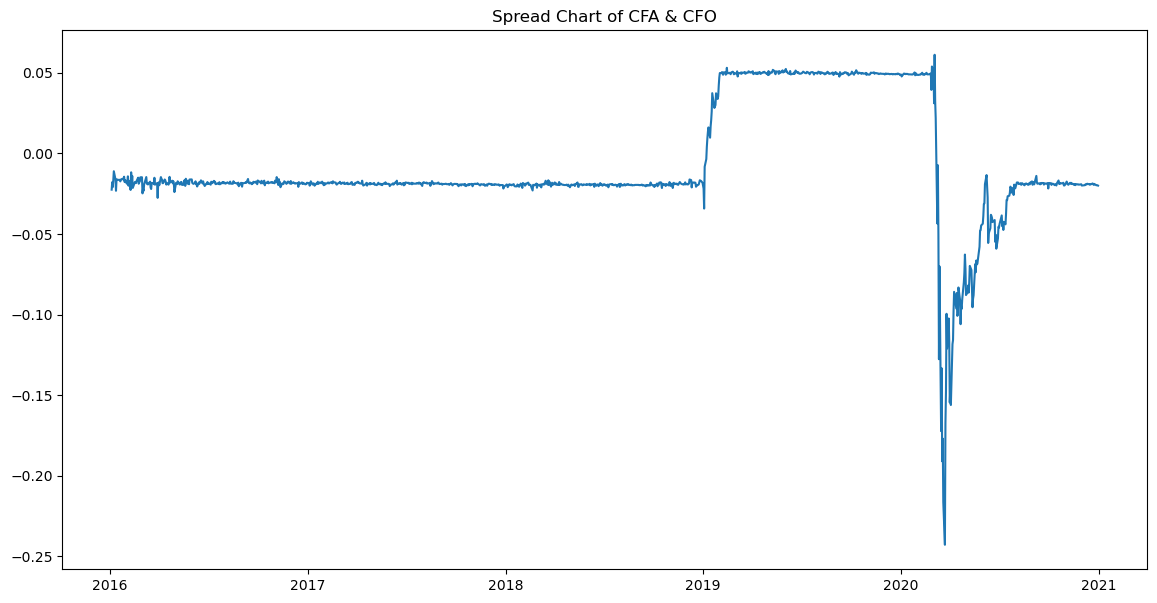

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(spread)
plt.title(f'Spread Chart of {asset1} & {asset2}')
plt.show()